# Introduction
You will practice solving classification problems using the iris dataset used in Week 3.


The iris data set consisted of the following 3 types of irises, 150 in total, collected on the same day in a pasture on the Gaspé Peninsula, Canada.

In [133]:
#predefines and import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# load data set
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = pd.DataFrame(iris.target, columns = ['Species'])
# rename columns
X.columns = [x.replace(' (cm)','') for x in X.columns]
print(X.columns)
print(iris.target_names)

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
['setosa' 'versicolor' 'virginica']


# Problem 1
## Select Feature and Categories

In [135]:
#filter out setosa
setosa_idx = Y == 0
Y = Y.loc[~setosa_idx.values]
X = X.loc[~setosa_idx.values]
#filter out other attributes except sepai, petal length
X = X[['sepal length','petal length']]
data = pd.concat([X,Y],axis=1)
print(X.shape)
print(Y.shape)
print(data.shape)
print(data.head())

(100, 2)
(100, 1)
(100, 3)
    sepal length  petal length  Species
50           7.0           4.7        1
51           6.4           4.5        1
52           6.9           4.9        1
53           5.5           4.0        1
54           6.5           4.6        1


# Problem 2
## Problem Analysis

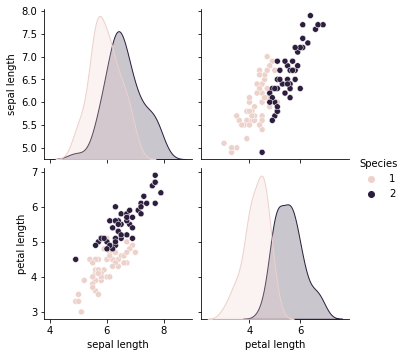

In [136]:
sns.pairplot(data = data,hue= 'Species')

# Problem 3
## Division of preprocessing/training data and verification data

In [137]:
from sklearn.model_selection import train_test_split
X = X.to_numpy()
Y = Y.to_numpy().reshape((Y.shape[0],))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)
print(f'train size: x-{X_train.shape}, y-{Y_train.shape}')
print(f'test size: x-{X_test.shape}, y-{Y_test.shape}')

train size: x-(75, 2), y-(75,)
test size: x-(25, 2), y-(25,)


# Problem 4
## Pretreatment/Standardization

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y=Y_train)
X_test = scaler.fit_transform(X_test,y=Y_test)
print(f'Train shape x: {X_train.shape}, y: {Y_train.shape}')
print(f'Test shape x: {X_test.shape}, y: {Y_test.shape}')

Train shape x: (75, 2), y: (75,)
Test shape x: (25, 2), y: (25,)


# Problem 5
## Learning and estimation

In [139]:
from sklearn.neighbors import KNeighborsClassifier

def kmean_predict(n,train, test):
    x_train, y_train = train
    x_test, y_test = test
    classifier = KNeighborsClassifier(n)
    classifier.fit(x_train, y_train)
    return classifier.predict(x_test), classifier.score(x_test, y_test)


train = (X_train,Y_train)
test = (X_test,Y_test)
for i in [1,3,5]:
    _, score = kmean_predict(i,train,test)
    print(f'Accuracy of {i}nn classifier: {score}')


Accuracy of 1nn classifier: 0.84
Accuracy of 3nn classifier: 0.84
Accuracy of 5nn classifier: 0.84


# Problem 6
## Evaluation

In [140]:
from sklearn.metrics import confusion_matrix
for i in [1,3,5]:
    predicted, _ = kmean_predict(i,train,test)
    print(f'Confusion Matrix of {i}nn :')
    print(confusion_matrix(Y_test, predicted))

Confusion Matrix of 1nn :
[[10  0]
 [ 4 11]]
Confusion Matrix of 3nn :
[[10  0]
 [ 4 11]]
Confusion Matrix of 5nn :
[[10  0]
 [ 4 11]]


## Evaluation of Binary Classification (BC)
### To evaluate BC, we need to understand the basic components of our outcome:
- Positive (P): The real positive cases in data
- Negative (N): Real negative cases


- True Positive (TP): Correctly predicted positive cases
- True Negative (TN): Correctly predicted negative cases
- False Positive (FP): False Alarm (negative but predicted as positive) - Type I Error
- False Negative (FN): Missed cases (positive but not detected) - Type II Error

### From that, we have:
This is important to reduce confusion
- $P = TP + FN$
- $N = TN + FP$
### And our basic evaluation metrics:
- Accuracy: The overall performance across all cases, the correctly precited rate, **How close you are to the overall picture**
    \begin{equation}
        ACC = \frac{Total Hits}{All Cases} = \frac{TP + TN}{TP + TN + FP + FN}
    \end{equation}
- Sensitivity (Recall): or True positive rate. I like to think this as the Positive side of Accuracy, how complete your True Positive to the whole Positives. **Can be thought of as 'half' of accuracy**
    \begin{equation}
        TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
    \end{equation}
- Precision (Positive Predictive Value): 
    - In the normal approach, we preceive Precision as consistency of our test results (like throwing a dart or shooting a bullet at the same spot - not nessarily the spot we aim for), while accuracy is the proximity of our shots to where we want them to be, regardless of their relative proximity with each others. 

    
    - Here, in statistics, precision is defined as the relevance (true positive) of the retreived information (of all the positive **predictions**)
        \begin{equation}
            PPV = \frac{TP}{TP + FP}
        \end{equation}
- F-score: This is just the harmony of precision and recall, or consistency and completeness
    \begin{equation}
            F = 2*\frac{Precision * Recall}{Precision + Recall}
        \end{equation}
### NOTE:
- So, to try and normalize the understanding of precision in both normal life and statistics, I like to think of all our positive predictions (TP + FP), all our 'seleted information' as the shots that we took. And taking the ratio of TP/(TP + FP) is just saying: "How many of our shots are of the same type (Positive, or it's really negative?)" or it's simply **"How close together are our shots?!"**

- Though as i mentioned above, precision here is closly tied with recall more then accuracy cause we're only working with the positives or positively predicted. A comparision of recall and precision is available on wiki where they phrase :**"precision as How relevance is our positive predictions while recall is How complete your positive predictions is"**

# Problem 7
## Visualization

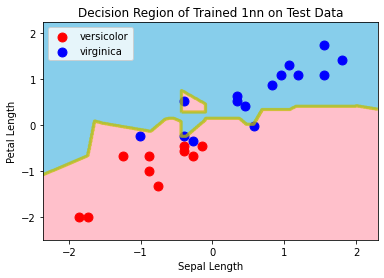

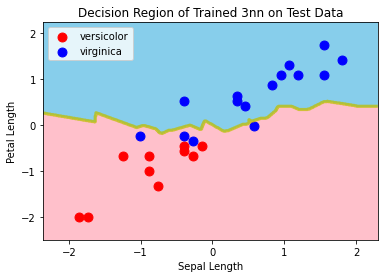

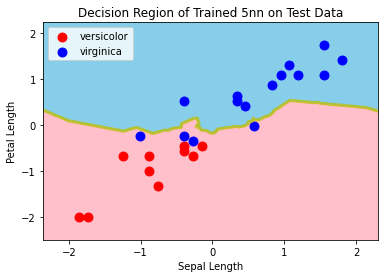

In [141]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'],class_count = 2):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['green', 'red', 'blue'] if class_count == 3 else ['red', 'blue']
    contourf_color = ['lightgreen','pink', 'skyblue'] if class_count == 3 else ['pink', 'skyblue']
    n_class = class_count
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

for i in [1,3,5]:
    model = KNeighborsClassifier(i).fit(X_train,Y_train)
    decision_region(X_test,Y_test, model,title = f'Decision Region of Trained {i}nn on Test Data',
    xlabel = 'Sepal Length', ylabel = 'Petal Length')


# Problem 8
## Learning By Other Methods

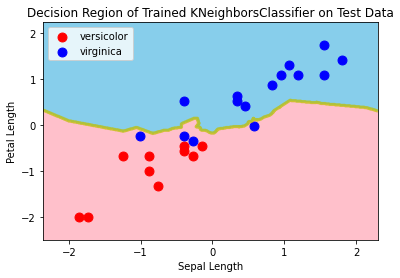

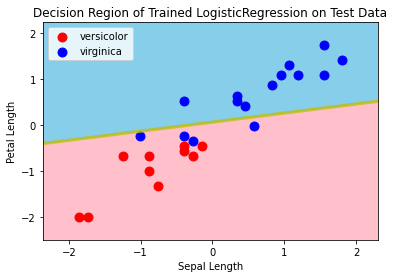

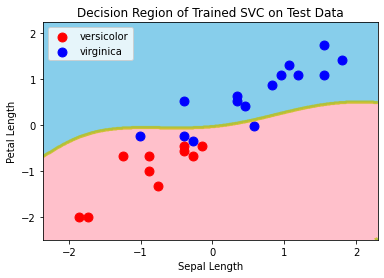

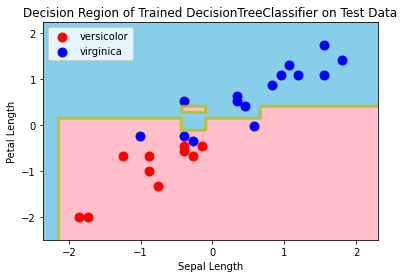

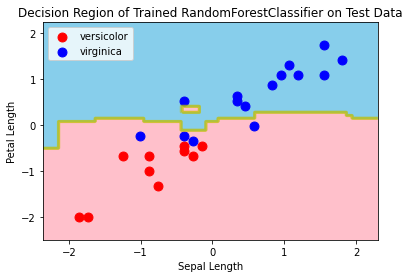

In [142]:
import sklearn.metrics as metrics
def build_n_test_classifier(classifier, train, test):
    x_train,y_train = train
    x_test, y_test = test
    classifier.fit(x_train, y_train)

    decision_region(x_test,y_test, classifier,title = f'Decision Region of Trained {classifier.__class__.__name__} on Test Data',
xlabel = 'Sepal Length', ylabel = 'Petal Length')

    predictions = classifier.predict(x_test)
    result = dict()
    # result['Predictions'] = predictions
    result['Accuracy'] = [metrics.accuracy_score(y_test,predictions)]
    result['F-Score'] = [metrics.f1_score(y_test,predictions)]
    result['Precision'] = [metrics.precision_score(y_test,predictions)]
    result['Recall'] = [metrics.recall_score(y_test,predictions)]
    # result['Classifier'] = classifier
    return result

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_list = [KNeighborsClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
summary = pd.DataFrame()
for cls in classifier_list:
    result = pd.DataFrame.from_dict(build_n_test_classifier(cls,train,test),orient='columns')
    result.index = [cls.__class__.__name__]
    summary = summary.append(result)


In [143]:
summary

,Accuracy,F-Score,Precision,Recall
KNeighborsClassifier,0.84,0.833333,0.714286,1.0
LogisticRegression,0.84,0.833333,0.714286,1.0
SVC,0.84,0.833333,0.714286,1.0
DecisionTreeClassifier,0.84,0.833333,0.714286,1.0
RandomForestClassifier,0.84,0.833333,0.714286,1.0


# Problem 9
## Comparison with and without standardization

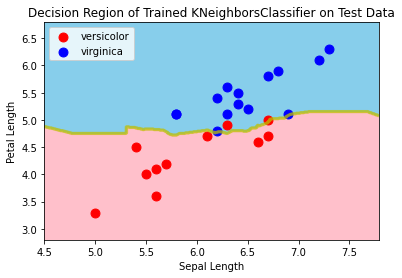

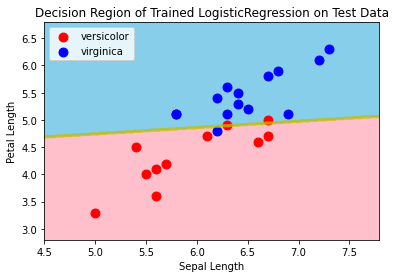

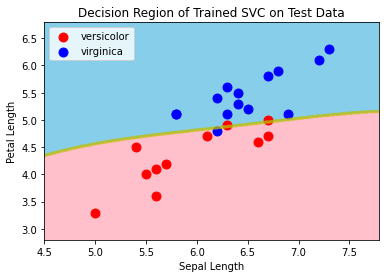

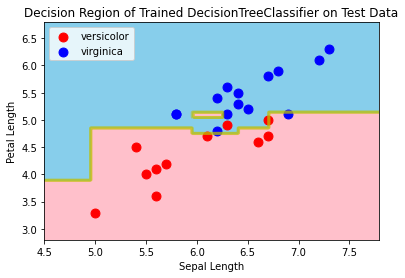

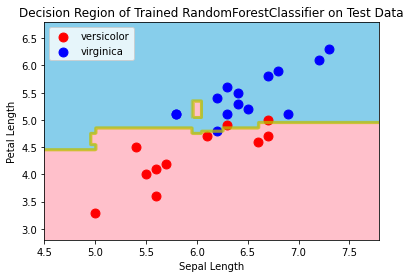

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)
train = (X_train, Y_train)
test= (X_test, Y_test)

summary_nons = pd.DataFrame()
for cls in classifier_list:
    result = pd.DataFrame.from_dict(build_n_test_classifier(cls,train,test),orient='columns')
    result.index = [cls.__class__.__name__]
    summary_nons = summary_nons.append(result)

In [145]:
summary_nons

,Accuracy,F-Score,Precision,Recall
KNeighborsClassifier,0.92,0.900000,1.0,0.818182
LogisticRegression,0.88,0.857143,0.9,0.818182
SVC,0.88,0.857143,0.9,0.818182
DecisionTreeClassifier,0.88,0.857143,0.9,0.818182
RandomForestClassifier,0.92,0.900000,1.0,0.818182


### Side by side of Summary results
Of normalized and non-normalized Data

In [146]:
print('Standadized: ')
print(summary)
print('---------------------------------------------------------')
print('Non-Standadized: ')
print(summary_nons)

Standadized: 
                        Accuracy   F-Score  Precision  Recall
KNeighborsClassifier        0.84  0.833333   0.714286     1.0
LogisticRegression          0.84  0.833333   0.714286     1.0
SVC                         0.84  0.833333   0.714286     1.0
DecisionTreeClassifier      0.84  0.833333   0.714286     1.0
RandomForestClassifier      0.84  0.833333   0.714286     1.0
---------------------------------------------------------
Non-Standadized: 
                        Accuracy   F-Score  Precision    Recall
KNeighborsClassifier        0.92  0.900000        1.0  0.818182
LogisticRegression          0.88  0.857143        0.9  0.818182
SVC                         0.88  0.857143        0.9  0.818182
DecisionTreeClassifier      0.88  0.857143        0.9  0.818182
RandomForestClassifier      0.92  0.900000        1.0  0.818182


### Discussion:
- Overall, non-standardized data lead to worse performance in all metrics
- Why? What is preprocessing that affects our result?

    - In simple terms, features with different scales contributes unevenly to the model

    - Like the example of gradient decent where if you have an attribute with much greater scale, Each step you take would go much more in that attirbute but not in others. Leading to weird situations.
    
    - Also, standardized distribution that's maybe normal or symetric or just follow a certain distribution is easier to work with, since much of our method based on some kind of assumption.


# Problem 10
## All Objective Variables

In [147]:
def build_n_test_classifier_multiclass(classifier, train, test, class_count = 3, class_names = ['setosa','versicolor', 'virginica']):
    x_train,y_train = train
    x_test, y_test = test
    classifier.fit(x_train, y_train)

    decision_region(x_test,y_test, classifier,title = f'Decision Region of Trained {classifier.__class__.__name__} on Test Data',
    xlabel = 'Sepal Length', ylabel = 'Petal Length',target_names = class_names,class_count = class_count)

    predictions = classifier.predict(x_test)
    result = dict()
    # result['Predictions'] = predictions
    result['Accuracy'] = [metrics.accuracy_score(y_test,predictions)]
    result['F-Score Micro Avg'] = [metrics.f1_score(y_test,predictions,average = 'micro')]
    result['F-Score Macro Avg'] = [metrics.f1_score(y_test,predictions,average = 'macro')]
    result['Precision Micro Avg'] = [metrics.precision_score(y_test,predictions,average = 'micro')]
    result['Precision Macro Avg'] = [metrics.precision_score(y_test,predictions,average = 'macro')]
    result['Recall Micro Avg' ] = [metrics.recall_score(y_test,predictions,average = 'micro')]
    result['Recall Macro Avg' ] = [metrics.recall_score(y_test,predictions,average = 'macro')]
    # result['Classifier'] = classifier
    return result

   sepal length  petal length
0           5.1           1.4
1           4.9           1.4
2           4.7           1.3
3           4.6           1.5
4           5.0           1.4
   Species
0        0
1        0
2        0
3        0
4        0
shapex: (150, 2), shapey: (150,)


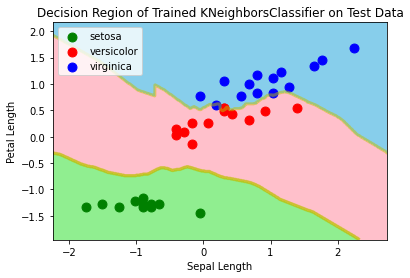

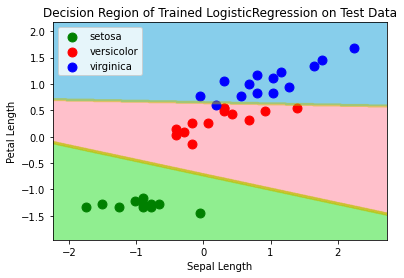

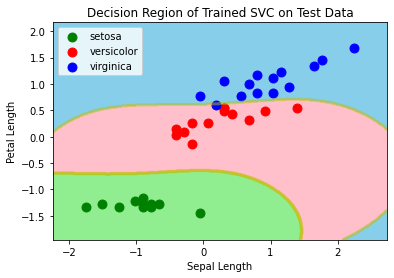

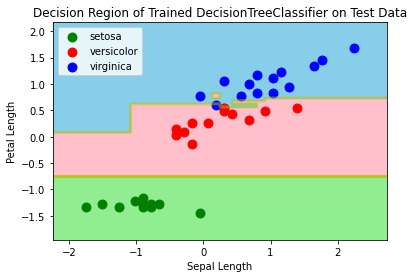

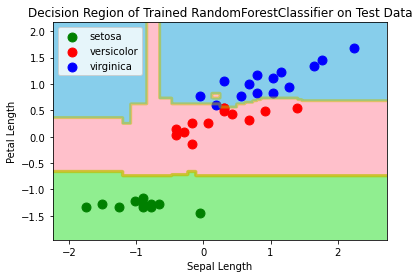

In [148]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = pd.DataFrame(iris.target, columns = ['Species'])
# rename columns
X.columns = [x.replace(' (cm)','') for x in X.columns]
#Remove
X = X[['sepal length','petal length']]
print(X.head())
print(Y.head())
#to numpy and standardize
X = X.to_numpy()
Y = Y.to_numpy().reshape((Y.shape[0],))
print(f'shapex: {X.shape}, shapey: {Y.shape}')
X = scaler.fit_transform(X,y=Y)

# split
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.25)
train = (x_train,y_train)
test = (x_test,y_test)
summary_full = pd.DataFrame()
for cls in classifier_list:
    result = pd.DataFrame.from_dict(build_n_test_classifier_multiclass(cls,train,test) ,orient='columns')
    result.index = [cls.__class__.__name__]
    summary_full = summary_full.append(result)


In [149]:
summary_full

,Accuracy,F-Score Micro Avg,F-Score Macro Avg,Precision Micro Avg,Precision Macro Avg,Recall Micro Avg,Recall Macro Avg
KNeighborsClassifier,0.921053,0.921053,0.925517,0.921053,0.927778,0.921053,0.924908
LogisticRegression,0.973684,0.973684,0.975309,0.973684,0.976190,0.973684,0.976190
SVC,0.973684,0.973684,0.975309,0.973684,0.976190,0.973684,0.976190
DecisionTreeClassifier,0.973684,0.973684,0.975309,0.973684,0.976190,0.973684,0.976190
RandomForestClassifier,0.973684,0.973684,0.975309,0.973684,0.976190,0.973684,0.976190


### About micro and marcro avg
**The idea is to identify the metrics for each class by using 'one-vs-all' separation**
- U compute all TP TN FP FN using this idea (for each class)

- Macro Avg is just the average of the metrics. Ex: $Avg_{macro}(TPR) = Avg(TPR)$

- Micro Avg of a metric is the ratio of the sum of each class's metric. Ex: $Avg_{micro}(TPR) = \frac{\sum{TP}}{\sum{P}}$

For this reason, the micro avg leans towards the class with lower metric compared to others (hence the word micro) and macro avg is just the avg of the bigger picture. [Ref](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin#:~:text=A%20macro%2Daverage%20will%20compute,to%20compute%20the%20average%20metric.)

### Conclusion: Problem 10
From all the metrics, it can be concluded that every classifier did a great job except for Kmean which falls a bit behind.
